## 3. Tackle the Titanic dataset

Exercise: _Tackle the Titanic dataset. A great place to start is on [Kaggle](https://www.kaggle.com/c/titanic). Alternatively, you can download the data from https://homl.info/titanic.tgz and unzip this tarball like you did for the housing data in Chapter 2. This will give you two CSV files: _train.csv_ and _test.csv_ which you can load using `pandas.read_csv()`. The goal is to train a classifier that can predict the `Survived` column based on the other columns._

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

In [35]:
train_data,test_data= load_titanic_data()

In [36]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
train_data.set_index('PassengerId',inplace=True)
test_data.set_index('PassengerId',inplace=True)

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [39]:
train_data[train_data['Sex']=='female']['Age'].median()

27.0

In [40]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
train_data[train_data['Cabin'].notna()]["Survived"].sum()/train_data[train_data['Cabin'].notna()].shape[0]

0.6666666666666666

In [42]:
train_data[train_data['Cabin'].isna()]["Survived"].sum()/train_data[train_data['Cabin'].isna()].shape[0]

0.29985443959243085

In [43]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [44]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [45]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline=Pipeline(
    [
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

In [47]:
from  sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline


cat_pipeline=Pipeline(
    [
       
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('cat_encoder',OneHotEncoder(sparse_output=False))
    ]
)

In [48]:
from sklearn.compose import ColumnTransformer,make_column_selector

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]
preprocessing_pipeline=ColumnTransformer(
    [
        ('num',num_pipeline,num_attribs),
        ('cat',cat_pipeline,cat_attribs)
    ]
)

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [50]:
y_train=train_data['Survived']
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [51]:


x_train=preprocessing_pipeline.fit_transform(train_data)

In [52]:
x_train

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [53]:
from sklearn.ensemble import  RandomForestClassifier

forest_clf= RandomForestClassifier(n_estimators=100,random_state=42)
forest_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [54]:
x_test=preprocessing_pipeline.transform(test_data)
y_pred=forest_clf.predict(x_test)

In [55]:
from sklearn.model_selection import cross_val_score
forest_score=cross_val_score(forest_clf,x_train,y_train,cv=10)
forest_score.mean()

0.8137578027465668

In [56]:
from sklearn.svm import SVC

svm_clf=SVC(gamma='auto')
svm_score=cross_val_score(svm_clf,x_train,y_train,cv=10)
svm_score.mean()

0.8249313358302123

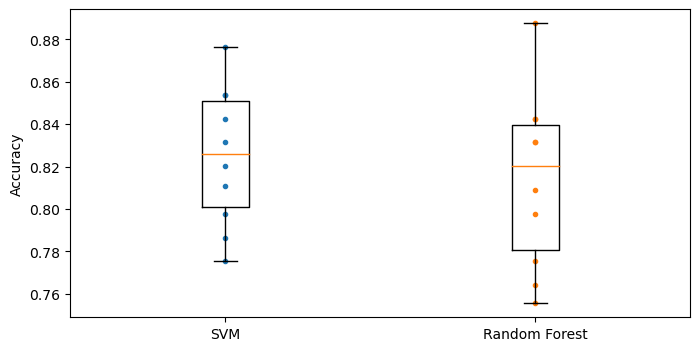

In [57]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_score, ".")
plt.plot([2]*10, forest_score, ".")
plt.boxplot([svm_score, forest_score], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy")
plt.show()

more preprocessing

creating age group

creating a custom transformer for this transformation

In [58]:
from sklearn.base import BaseEstimator,TransformerMixin

class Age_Transformer(BaseEstimator,TransformerMixin):
    def __init__(self,fit_value=15):
        self.fit_value=fit_value
        
    def transform(self,x):
        return (x//self.fit_value)*self.fit_value
        
        

In [59]:
train_data['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [60]:
age_transformer=Age_Transformer(15)
age_bucket=age_transformer.transform(train_data['Age'])
age_bucket

PassengerId
1      15.0
2      30.0
3      15.0
4      30.0
5      30.0
       ... 
887    15.0
888    15.0
889     NaN
890    15.0
891    30.0
Name: Age, Length: 891, dtype: float64

* Replace **SibSp** and **Parch** with their sum.

In [74]:
age_bucket.isna().sum()

177

In [64]:
class Sib_Sum_Transformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[:, [0]] + X[:, [1]]

In [31]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
